In [1]:
'''

Good job!!

Ana T:

80% / 85% 

'''

'\n\nGood job!!\n\nAna T:\n\n80% / 85% \n\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Gonzalo Cardenal & Quinten De Block

## Exercise 1: Potassium Channel

In [2]:
#defining alpha, beta, d/dt
def alphan(V):
    return 0.01*(V+55)/(1-np.exp(-0.1*(V+55)))

def betan(V):
    return 0.125*np.exp(-0.0125*(V+65))

def Ik(gk,n,V,Ek):
    return gk*n**4*(V-Ek)

def dn(V,x):
    return alphan(V)*(1-x)-betan(V)*x

<ipython-input-2-d49956162928>:3: RuntimeWarning: invalid value encountered in true_divide
  return 0.01*(V+55)/(1-np.exp(-0.1*(V+55)))


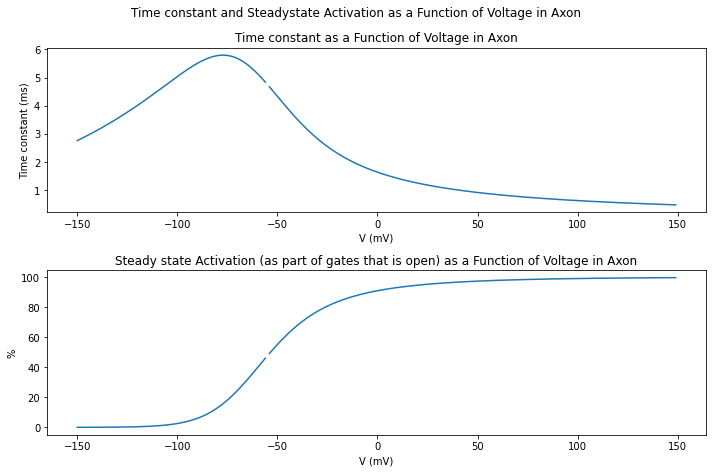

In [3]:
# calculating taun and ninf as a function of voltage in squid axon
V = np.arange(-150,150,1)
taun = 1/(alphan(V)+betan(V))
ninf = alphan(V)/(alphan(V)+betan(V))

fig, axs = plt.subplots(2,1, figsize = (10,6.66))
plt.suptitle("Time constant and Steadystate Activation as a Function of Voltage in Axon")
plt.setp(axs[:], xlabel='V (mV)')
axs[0].plot(V,taun)
axs[0].set_title("Time constant as a Function of Voltage in Axon")
axs[0].set_ylabel("Time constant (ms)")
axs[1].plot(V,ninf*100)
axs[1].set_title("Steady state Activation (as part of gates that is open) as a Function of Voltage in Axon")
axs[1].set_ylabel("%")
fig.tight_layout();

In [5]:
#general euler method of defining ODE
def euler(f_func, x_0, V, t):
  x = np.zeros(len(t))
  x[0] = x_0
  for i in range(0,len(t)-1):
      x[i+1]=x[i]+f_func(V[i],x[i])*dt
  return x

Time at which difference to steady state is smaller than 0.001 is 22.2ms


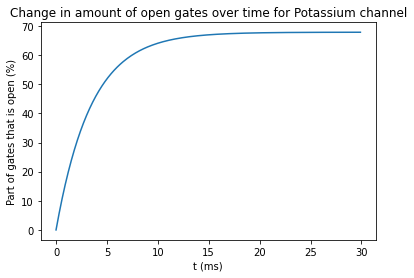

In [6]:
#calculating n (open gates) as a function of time with given voltage in axon = -40mV
n1_0 = 0
t_max = 30
dt = 0.1
t = np.arange(0,t_max,dt)
V1 = np.full(np.size(t),-40)
n1 = euler(dn, n1_0, V1, t)
plt.plot(t,n1*100)
plt.xlabel("t (ms)")
plt.ylabel('Part of gates that is open (%)')
plt.title('Change in amount of open gates over time for Potassium channel');
#to calculate difference to steady state
ndiff = n1 - n1[len(t)-1]
#print(ndiff)
v = -0.001
pos1 = (np.abs(ndiff - v)).argmin()*dt
#pos1 = ndiff[np.abs(ndiff - -0.001).argmin()]
#position = np.argmin(ndiff < -10**-3)
print('Time at which difference to steady state is smaller than 0.001 is '+ str(round(pos1,1)) + 'ms')

In [ ]:
'''

Great plots!

'''

### Voltage clamp

In [7]:
#defining function that is given in exercise
def Vfunc(Vc,dt):
    V = np.zeros(len(t))
    for i in np.arange(0,len(t)):
        if i*dt >= 2:
            V[i] = Vc
        else:
            V[i] = -65
    return V

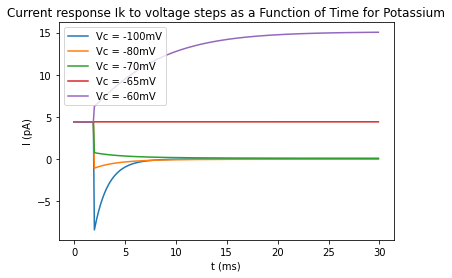

In [8]:
#Voltage clamp
t_max = 30
dt = 0.1
t = np.arange(0,t_max,dt)
n2 = np.zeros((5,len(t)))
I = np.zeros((5,len(t)))
Vc = np.array([-100,-80,-75,-65,-60])

for i in range(0,5,1):
    V2 = Vfunc(Vc[i],dt)
    n2[i,:] = euler(dn,0.3177,V2,t)
    I[i,:] = Ik(36*1e-9,n2[i,:],V2*1e-3,-77*1e-3)
    plt.plot(t,I[i,:]*1e12)
plt.legend(['Vc = -100mV','Vc = -80mV','Vc = -70mV','Vc = -65mV','Vc = -60mV'])
plt.xlabel('t (ms)')
plt.ylabel('I (pA)')
plt.title('Current response Ik to voltage steps as a Function of Time for Potassium');

The experiment learns us that the current stabilizes to a certain value, dependent on the voltage introduced by the voltage clamp. A high voltage difference leads to a higher difference in current, with the current given when the voltage given is equal to $E_k$. Introduced voltages lower than Ek will higher the current, introduced voltages higher than Ek will lower the current. The predicted effect is that a current that differs from the stable current will make the membrane potential differ from the Ek-value.

From the time constant plot, we see that the time constant has a peak at +/- -100mV. At our current response plot this correspond with the slower rising/falling of the Vc-curve when Vc is closer to -100 mV 

In [ ]:
'''

From the time constant plor we could observe that the maximum value is at ~ -77 mV (Ek)
When the voltage is higher (e.g. more that -65), we observe an increase in positive current. This is refered as Outward current
and represents the flow of cations K+ from inside the cell to the outside. 
This eventually will lead to repolarization or hyperpolarization of the membrane potential.

Of course, when the cell is hyperpolarized ( less voltage membrane like in -100 mV), there is not a constant big effect in the currents.

'''

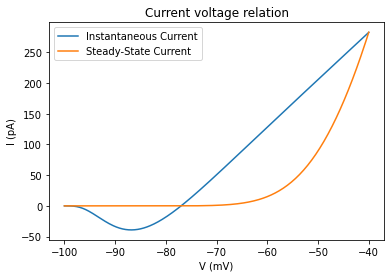

In [10]:
#Current voltage relation
V3 = np.linspace(-100,-40, num=300)
Iinst = Ik(36*1e-9,n1,V3*1e-3,-77*1e-3)
ninf = alphan(V3)/(alphan(V3)+betan(V3))
Istat = Ik(36*1e-9,ninf,V3*1e-3,-77*1e-3)
plt.plot(V3,Iinst*1e12)
plt.plot(V3,Istat*1e12)
plt.legend(['Instantaneous Current','Steady-State Current'])
plt.title('Current voltage relation')
plt.xlabel('V (mV)')
plt.ylabel('I (pA)');

In [ ]:
'''

We should observe smaller values and a linear function for instantaneous current.
As a reminder: Instantaneous current is when n(t=0).
For the voltage clamp the initial condition n(t = 0) = 0.3177.
I think the mistake was that you were using n(t=0) as zero.

'''

## Exercise 2: Sodium ion Channel

In [12]:
#defining alpha, beta, d/dt
def Ina(gna,m,h,V,Ena):
    return gna*m**3*h*(V-Ena)

def alpham(V):
    return 0.1*(V+40)/(1-np.exp(-0.1*(V+40)))

def betam(V):
    return 4*np.exp(-0.0556*(V+65))

def alphah(V):
    return 0.07*np.exp(-0.05*(V+65))

def betah(V):
    return 1/(1+np.exp(-0.1*(V+35)))

def dm(V,x):
    return alpham(V)*(1-x)-betam(V)*x

def dh(V,x):
    return alphah(V)*(1-x)-betah(V)*x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


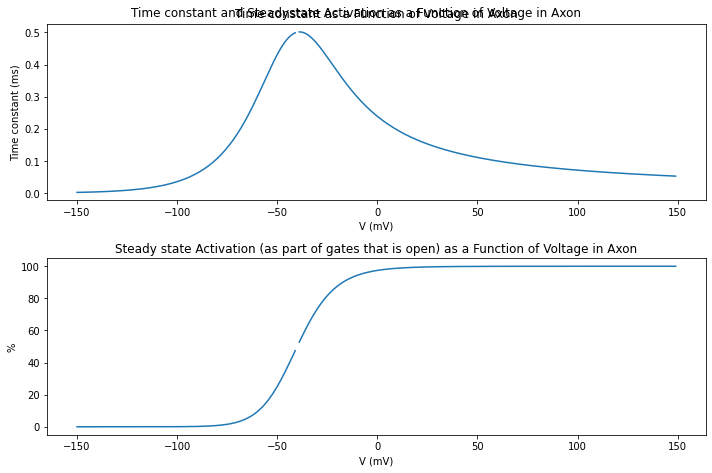

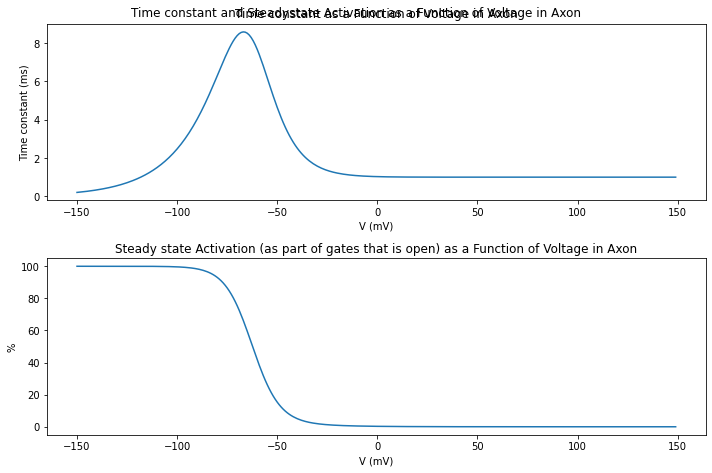

In [13]:
# calculating taum/h and m/hinf as a function of voltage in squid axon
V = np.arange(-150,150,1)
taum = 1/(alpham(V)+betam(V))
minf = alpham(V)/(alpham(V)+betam(V))

fig, axs = plt.subplots(2,1, figsize = (10,6.66))
plt.suptitle("Time constant and Steadystate Activation as a Function of Voltage in Axon")
plt.setp(axs[:], xlabel='V (mV)')
axs[0].plot(V,taum)
axs[0].set_title("Time constant as a Function of Voltage in Axon")
axs[0].set_ylabel("Time constant (ms)")
axs[1].plot(V,minf*100)
axs[1].set_title("Steady state Activation (as part of gates that is open) as a Function of Voltage in Axon")
axs[1].set_ylabel("%")
fig.tight_layout()

V = np.arange(-150,150,1)
tauh = 1/(alphah(V)+betah(V))
hinf = alphah(V)/(alphah(V)+betah(V))

fig, axs = plt.subplots(2,1, figsize = (10,6.66))
plt.suptitle("Time constant and Steadystate Activation as a Function of Voltage in Axon")
plt.setp(axs[:], xlabel='V (mV)')
axs[0].plot(V,tauh)
axs[0].set_title("Time constant as a Function of Voltage in Axon")
axs[0].set_ylabel("Time constant (ms)")
axs[1].plot(V,hinf*100)
axs[1].set_title("Steady state Activation (as part of gates that is open) as a Function of Voltage in Axon")
axs[1].set_ylabel("%")
fig.tight_layout();

Comparing with the n variable, the time constant peak of the m variable is shifted to higher membrane potentials and the peak is smaller. This m variable has a faster time constant. The same is valid for the steady state activation. 
Comparing with the n variable, the time constant peak of the h variable is shifted to higher membrane potentials and the peak is smaller, also than the h variable. The steady state activation is inverse to the n and the h variables and moves faster.

In [14]:
'''

I think is important to make sure that by observing the figure, other person knows what are you talking about,
which plot is for m? and for h?

Good explanation

'''

'\n\nI think is important to make sure that by observing the figure, other person knows what are you talking about,\nwhich plot is for m? and for h?\n\nGood explanation\n\n'

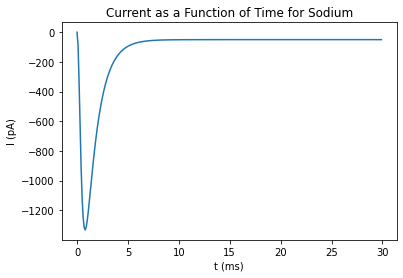

In [15]:
#calculating current at given voltage = -20mV and initial conditions for ODEs
m1_0 = 0.0529
h1_0 = 0.5961
t_max = 30
dt = 0.1
t = np.arange(0,t_max,dt)
V1 = np.full(np.size(t),-20)
m1 = euler(dm, m1_0, V1, t)
h1 = euler(dh, h1_0, V1, t)
Ina1 = Ina(120*1e-9,m1,h1,V1*1e-3,50*1e-3)
plt.plot(t,Ina1*1e12)
plt.xlabel('t (ms)')
plt.ylabel('I (pA)')
plt.title('Current as a Function of Time for Sodium');
#to calculate difference to steady state (doesn't work unfortunately)
Inadiff = (Ina1 - Ina1[len(t)-1])*1e12
#print(Inadiff)
#v = -0.001
#pos2 = (np.abs(ndiff - v)).argmin()*dt
#pos = np.argmin(ndiff < -10**-3)
#print(pos)
#print('Time at which difference to steady state is smaller than 0.01 is '+ str(round(pos2,1)) + 'ms')

### Voltage Clamp

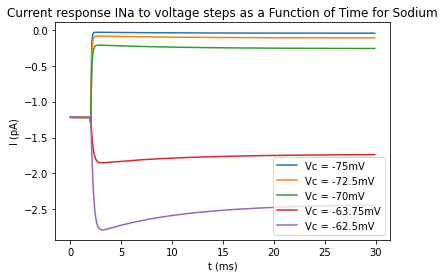

In [22]:
#Voltage clamp
t_max = 30
dt = 0.1
t = np.arange(0,t_max,dt)
m2 = np.zeros((5,len(t)))
h2 = np.zeros((5,len(t)))  
I2 = np.zeros((5,len(t)))
Vc = np.array([-75,-72.5,-70,-63.75,-62.5])

for i in range(0,5,1):
    V2 = Vfunc(Vc[i],dt)
    m2[i,:] = euler(dm,m1_0,V2,t)
    h2[i,:] = euler(dh,h1_0,V2,t)
    I2[i,:] = Ina(120*1e-9,m2[i,:],h2[i,:],V2*1e-3,50*1e-3)
    plt.plot(t,I2[i,:]*1e12)
plt.legend(['Vc = -75mV','Vc = -72.5mV','Vc = -70mV','Vc = -63.75mV','Vc = -62.5mV'])
plt.xlabel('t (ms)')
plt.ylabel('I (pA)')
plt.title('Current response INa to voltage steps as a Function of Time for Sodium');

In [17]:
'''

In order to observe the same plot or similar shapes from 2.b it is a good idea to try higher values of V.
What mechanism are responsible for this sodium current?

'''

'\n\nIn order to observe the same plot or similar shapes from 2.b it is a good idea to try higher values of V.\nWhat mechanism are responsible for this sodium current?\n\n'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


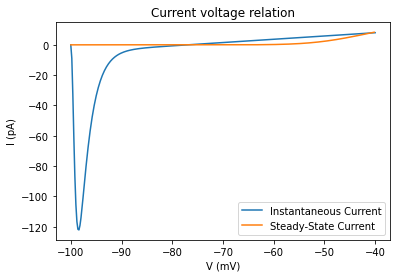

In [23]:
#Current voltage relation
V3 = np.linspace(-100,-40, num=300)
Iinst = Ina(36*1e-9,m1,h1,V3*1e-3,-77*1e-3)
minf = alpham(V3)/(alpham(V3)+betam(V3))
hinf = alphah(V3)/(alphah(V3)+betah(V3))
Istat = Ina(36*1e-9,minf,hinf,V3*1e-3,-77*1e-3)
plt.plot(V3,Iinst*1e12)
plt.plot(V3,Istat*1e12)
plt.legend(['Instantaneous Current','Steady-State Current'])
plt.title('Current voltage relation')
plt.xlabel('V (mV)')
plt.ylabel('I (pA)');

Compared to 1d), this plot shows that the current fluctuation over the given voltage is situated lower. The instantaneous current gives also a low peak for values of voltage close to -100mV. The trend that the curves switch from upper/lower at voltage around -75mV can also be seen at 1d). The steady state current has only a high rise at values close to -40mV and the instantaneous current firstly decays at values close to -100mV, before rising.

In [ ]:
'''

I think there something odd with your functions for current and voltage. Because we should observe
a lineal plot for instantaneous current (m and h when time is zero, m(t = 0) = 0.0529,
h(t = 0) = 0.5961). and for the steady state current We observe the same shape as in the 
blue line but with minimun value around -40 mV which is related with the 
firing threshold.

You did a good job! If you have questions please attend the tutorial for explanation.

'''